In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
# Load the datasets
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [5]:
# Standarize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply k-means clustering
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [7]:
# USE PCA for visualization 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'Second Principal Component')

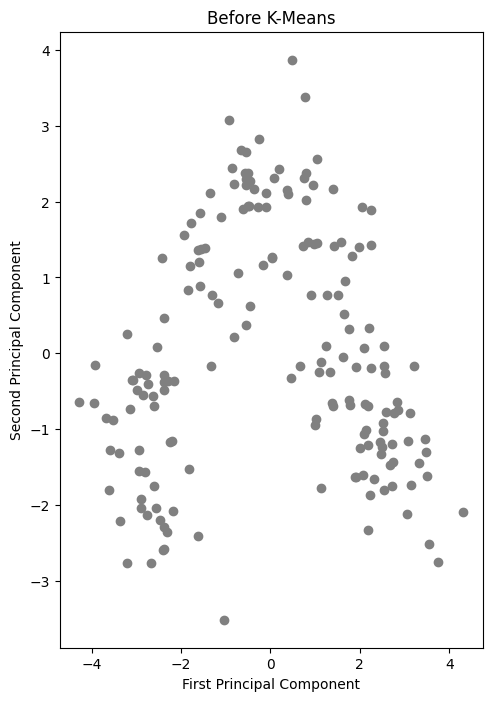

In [8]:
# Visualize the result
plt.figure(figsize=(12,8))

# Before k-means
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray')
plt.title('Before K-Means')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

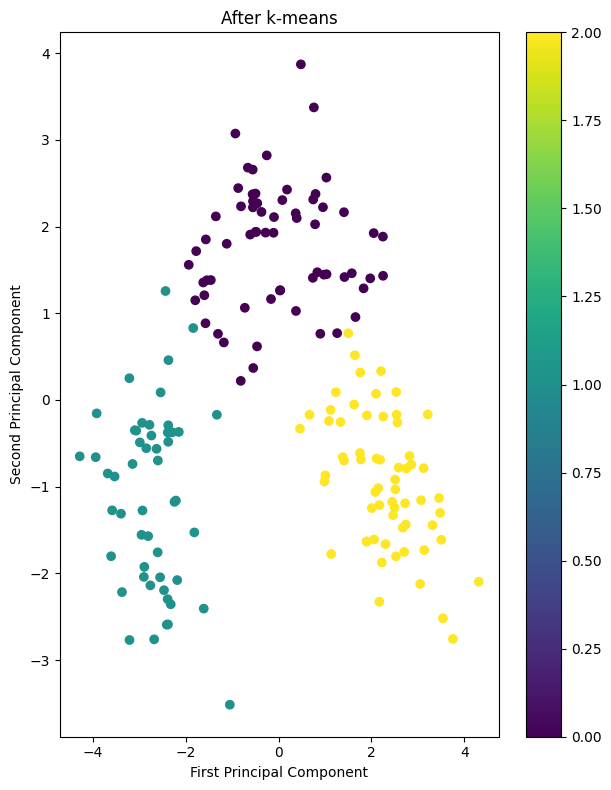

In [9]:
# Visualize the result
plt.figure(figsize=(12,8))

# After k-means
plt.subplot(122)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('After k-means')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.colorbar(scatter)
plt.tight_layout()
plt.show()

In [10]:
# Evaluate the clustering
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.2f}")

Silhouette Score: 0.28


In [12]:
# Analyze cluster characteristics
for i in range(n_cluster):
    cluster = X[cluster_labels == i]
    print(f"\nCluster {i} characteristics:")
    for j, feature in enumerate(wine.feature_names):
        print(f"{feature}: {cluster[:, j].mean():.2f}")


Cluster 0 characteristics:
alcohol: 12.25
malic_acid: 1.90
ash: 2.23
alcalinity_of_ash: 20.06
magnesium: 92.74
total_phenols: 2.25
flavanoids: 2.05
nonflavanoid_phenols: 0.36
proanthocyanins: 1.62
color_intensity: 2.97
hue: 1.06
od280/od315_of_diluted_wines: 2.80
proline: 510.17

Cluster 1 characteristics:
alcohol: 13.13
malic_acid: 3.31
ash: 2.42
alcalinity_of_ash: 21.24
magnesium: 98.67
total_phenols: 1.68
flavanoids: 0.82
nonflavanoid_phenols: 0.45
proanthocyanins: 1.15
color_intensity: 7.23
hue: 0.69
od280/od315_of_diluted_wines: 1.70
proline: 619.06

Cluster 2 characteristics:
alcohol: 13.68
malic_acid: 2.00
ash: 2.47
alcalinity_of_ash: 17.46
magnesium: 107.97
total_phenols: 2.85
flavanoids: 3.00
nonflavanoid_phenols: 0.29
proanthocyanins: 1.92
color_intensity: 5.45
hue: 1.07
od280/od315_of_diluted_wines: 3.16
proline: 1100.23


In the context of K-means clustering, the silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

- **Silhouette Score = 1**: Perfect clustering. Each point is very close to the center of its own cluster and far from the centers of other clusters.
- **Silhouette Score = 0**: The points are on or very close to the decision boundary between two neighboring clusters.
- **Silhouette Score < 0**: Points might have been assigned to the wrong clusters, indicating that the clustering result is suboptimal.

A silhouette score of **0.28** suggests that the clustering structure is somewhat weak. This means that the clusters are not very well-separated and some data points might be close to the boundary between clusters. This could imply that:
- The number of clusters chosen might not be optimal.
- The data might not naturally form distinct clusters.
- Additional preprocessing or a different clustering algorithm might be necessary to improve the clustering performance.